## Autoencoder t-SNE

- Mnist
- Neural Network
- 1 hidden layers

### 1. Settings

#### 1) Import required libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#### 2) Set hyperparameters

In [3]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 5

### 2. Data

#### 1) Download Data

In [4]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

#### 2) Set DataLoader

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

### 3. Model & Optimizer

#### 1) Model

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Linear(28*28,20)  #(Input size) ,latent variable
        self.decoder = nn.Linear(20,28*28)
    
    def forward(self,x):
        x = x.view(batch_size, -1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size,1,28,28)
        
        return encoded, out

model = Autoencoder().cuda()  

#### 2) Loss function & Optimizer

In [7]:
loss_func = nn.MSELoss()  #loss function : Mean Squared error
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### 4. Train

In [11]:
loss_arr = []

for i in range(num_epoch):
    for j, [image,label] in enumerate(train_loader):
        x = Variable(image).cuda()
        
        optimizer.zero_grad()
        _, output = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()
    
    if j % 100 == 0:
        print(loss)
        loss_arr.append(loss.cpu().data.numpy())   

### 5. Check with Train Image

torch.Size([16, 28, 28])


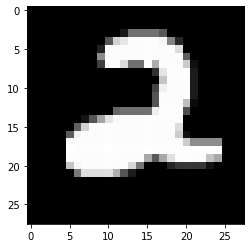

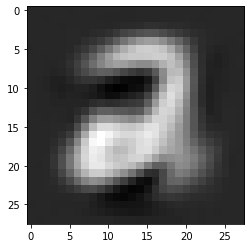

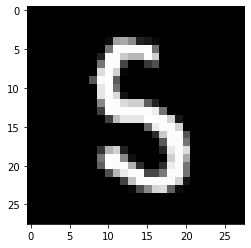

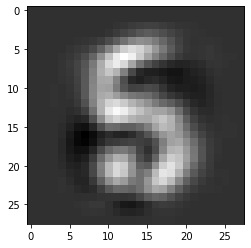

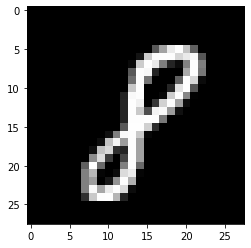

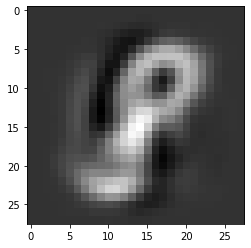

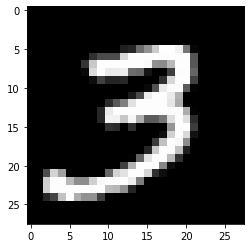

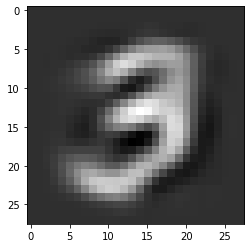

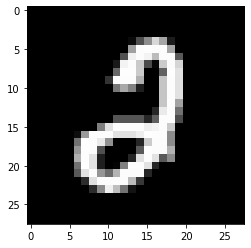

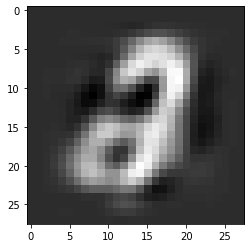

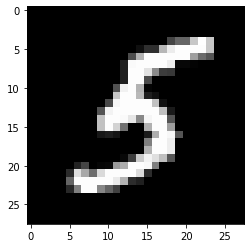

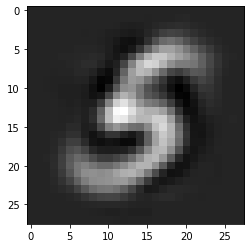

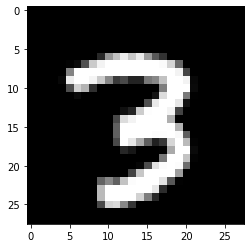

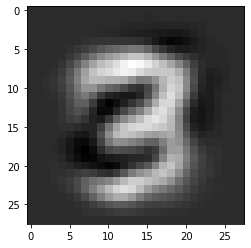

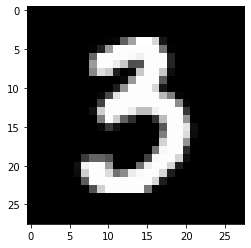

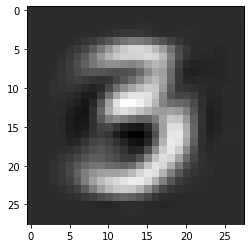

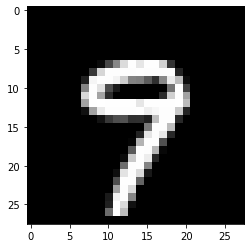

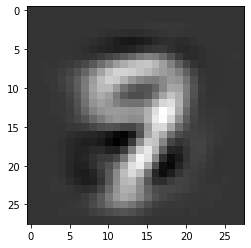

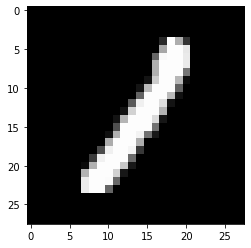

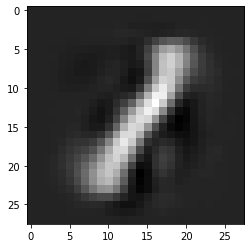

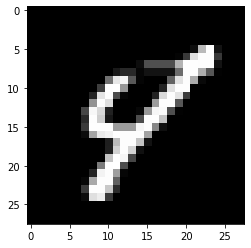

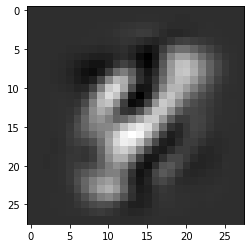

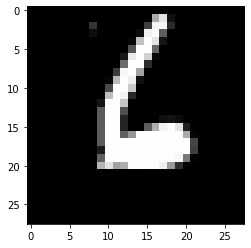

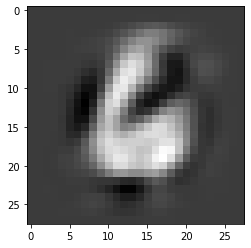

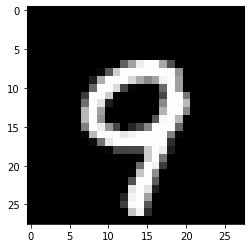

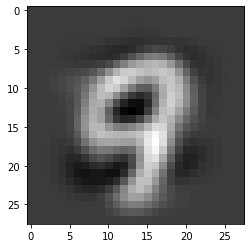

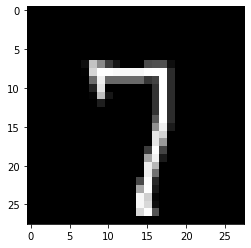

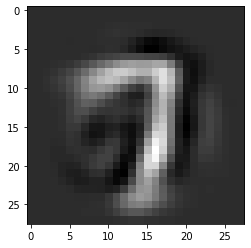

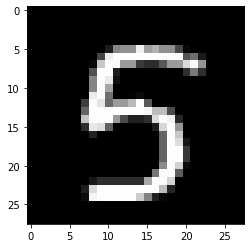

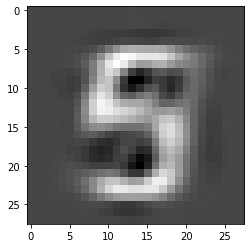

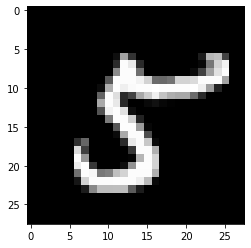

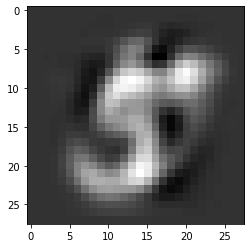

In [12]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()
    

### 6. Test the AutoEncoder

In [13]:
total_arr = []
for i in range(1):
    for j,[image,label] in enumerate(test_loader):
        x = Variable(image).cuda()
        
        optimizer.zero_grad()
        encoded,output = model.forward(x)
        for k in range(batch_size):
            total_arr.append(encoded[k].view(-1).cpu().data.numpy())
        
        if j >125:
            break
            
print(len(total_arr))

2032


### 7. t-SNE

In [14]:
print("\n------Starting TSNE------\n")

tsne_model = TSNE(n_components=2, init='pca',random_state=0)
result = tsne_model.fit_transform(total_arr)

print("\n------TSNE Done------\n")


------Starting TSNE------


------TSNE Done------



In [15]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = image
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


------Starting to plot------

0/2032
1/2032
2/2032
3/2032
4/2032
5/2032
6/2032
7/2032
8/2032
9/2032
10/2032
11/2032
12/2032
13/2032
14/2032
15/2032
16/2032
17/2032
18/2032
19/2032
20/2032
21/2032
22/2032
23/2032
24/2032
25/2032
26/2032
27/2032
28/2032
29/2032
30/2032
31/2032
32/2032
33/2032
34/2032
35/2032
36/2032
37/2032
38/2032
39/2032
40/2032
41/2032
42/2032
43/2032
44/2032
45/2032
46/2032
47/2032
48/2032
49/2032
50/2032
51/2032
52/2032
53/2032
54/2032
55/2032
56/2032
57/2032
58/2032
59/2032
60/2032
61/2032
62/2032
63/2032
64/2032
65/2032
66/2032
67/2032
68/2032
69/2032
70/2032
71/2032
72/2032
73/2032
74/2032
75/2032
76/2032
77/2032
78/2032
79/2032
80/2032
81/2032
82/2032
83/2032
84/2032
85/2032
86/2032
87/2032
88/2032
89/2032
90/2032
91/2032
92/2032
93/2032
94/2032
95/2032
96/2032
97/2032
98/2032
99/2032
100/2032
101/2032
102/2032
103/2032
104/2032
105/2032
106/2032
107/2032
108/2032
109/2032
110/2032
111/2032
112/2032
113/2032
114/2032
115/2032
116/2032
117/2032
118/2032
119/2032

1008/2032
1009/2032
1010/2032
1011/2032
1012/2032
1013/2032
1014/2032
1015/2032
1016/2032
1017/2032
1018/2032
1019/2032
1020/2032
1021/2032
1022/2032
1023/2032
1024/2032
1025/2032
1026/2032
1027/2032
1028/2032
1029/2032
1030/2032
1031/2032
1032/2032
1033/2032
1034/2032
1035/2032
1036/2032
1037/2032
1038/2032
1039/2032
1040/2032
1041/2032
1042/2032
1043/2032
1044/2032
1045/2032
1046/2032
1047/2032
1048/2032
1049/2032
1050/2032
1051/2032
1052/2032
1053/2032
1054/2032
1055/2032
1056/2032
1057/2032
1058/2032
1059/2032
1060/2032
1061/2032
1062/2032
1063/2032
1064/2032
1065/2032
1066/2032
1067/2032
1068/2032
1069/2032
1070/2032
1071/2032
1072/2032
1073/2032
1074/2032
1075/2032
1076/2032
1077/2032
1078/2032
1079/2032
1080/2032
1081/2032
1082/2032
1083/2032
1084/2032
1085/2032
1086/2032
1087/2032
1088/2032
1089/2032
1090/2032
1091/2032
1092/2032
1093/2032
1094/2032
1095/2032
1096/2032
1097/2032
1098/2032
1099/2032
1100/2032
1101/2032
1102/2032
1103/2032
1104/2032
1105/2032
1106/2032
1107/2032


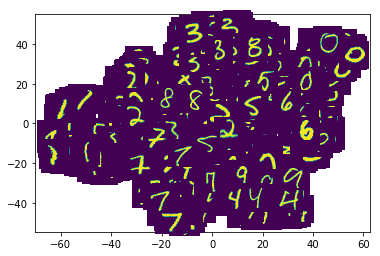

In [16]:
print("\n------Starting to plot------\n")

for i in range(len(result)):
    print("{}/{}".format(i,len(result)))
    image = mnist_test[i][0][0].numpy()
    imscatter(result[i,0],result[i,1], image=image ,zoom=0.2)

plt.show()